In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("weatherAUS.csv")
data.head(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [3]:
data.shape

(142193, 24)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

In [5]:
data.dropna(inplace=True)
data.drop(['RISK_MM'], axis=1, inplace=True)
data['RainToday'].replace({'No':0, 'Yes':1}, inplace=True)
data['RainTomorrow'].replace({'No':0, 'Yes':1}, inplace=True)
data.shape

(56420, 23)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56420 entries, 5939 to 139112
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           56420 non-null  object 
 1   Location       56420 non-null  object 
 2   MinTemp        56420 non-null  float64
 3   MaxTemp        56420 non-null  float64
 4   Rainfall       56420 non-null  float64
 5   Evaporation    56420 non-null  float64
 6   Sunshine       56420 non-null  float64
 7   WindGustDir    56420 non-null  object 
 8   WindGustSpeed  56420 non-null  float64
 9   WindDir9am     56420 non-null  object 
 10  WindDir3pm     56420 non-null  object 
 11  WindSpeed9am   56420 non-null  float64
 12  WindSpeed3pm   56420 non-null  float64
 13  Humidity9am    56420 non-null  float64
 14  Humidity3pm    56420 non-null  float64
 15  Pressure9am    56420 non-null  float64
 16  Pressure3pm    56420 non-null  float64
 17  Cloud9am       56420 non-null  float64
 18  Cl

In [7]:
target = data['RainTomorrow']
data.drop(['RainTomorrow'], axis=1, inplace=True)

In [8]:
numerical_cols = [col for col in data.columns if data[col].dtype != 'O']
categorical_cols = list(set(data.columns) - set(numerical_cols))

In [9]:
print('Категориальные признаки: {}'.format(categorical_cols))
print('Вещественные признаки: {}'.format(numerical_cols))

Категориальные признаки: ['Date', 'WindGustDir', 'WindDir3pm', 'WindDir9am', 'Location']
Вещественные признаки: ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday']


Обработка признака Date

In [10]:
data['Date'] = pd.to_datetime(data['Date'])
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day
data.drop(['Date'], axis=1, inplace=True)
data.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Year,Month,Day
5939,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,SW,...,1006.3,1004.4,2.0,5.0,26.6,33.4,0,2009,1,1
5940,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,SSE,...,1012.9,1012.1,1.0,1.0,20.3,27.0,0,2009,1,2
5942,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,NNW,...,1012.3,1009.2,1.0,6.0,28.7,34.9,0,2009,1,4
5943,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,WSW,...,1012.7,1009.1,1.0,5.0,29.1,35.6,0,2009,1,5
5944,Cobar,24.2,41.0,0.0,11.2,8.4,WNW,35.0,NW,WNW,...,1010.7,1007.4,1.0,6.0,33.6,37.6,0,2009,1,6


In [11]:
numerical_cols = [col for col in data.columns if data[col].dtype != 'O']
categorical_cols = list(set(data.columns) - set(numerical_cols))
print('Категориальные признаки: {}'.format(categorical_cols))
print('Вещественные признаки: {}'.format(numerical_cols))

Категориальные признаки: ['WindDir9am', 'WindDir3pm', 'Location', 'WindGustDir']
Вещественные признаки: ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'Year', 'Month', 'Day']


Обработка признака Location

In [12]:
from sklearn.preprocessing import LabelEncoder

data['Location'] = LabelEncoder().fit_transform(data['Location'].values)
data.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Year,Month,Day
5939,4,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,SW,...,1006.3,1004.4,2.0,5.0,26.6,33.4,0,2009,1,1
5940,4,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,SSE,...,1012.9,1012.1,1.0,1.0,20.3,27.0,0,2009,1,2
5942,4,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,NNW,...,1012.3,1009.2,1.0,6.0,28.7,34.9,0,2009,1,4
5943,4,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,WSW,...,1012.7,1009.1,1.0,5.0,29.1,35.6,0,2009,1,5
5944,4,24.2,41.0,0.0,11.2,8.4,WNW,35.0,NW,WNW,...,1010.7,1007.4,1.0,6.0,33.6,37.6,0,2009,1,6


In [13]:
numerical_cols = [col for col in data.columns if data[col].dtype != 'O']
categorical_cols = list(set(data.columns) - set(numerical_cols))
print('Категориальные признаки: {}'.format(categorical_cols))
print('Вещественные признаки: {}'.format(numerical_cols))

Категориальные признаки: ['WindDir9am', 'WindDir3pm', 'WindGustDir']
Вещественные признаки: ['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'Year', 'Month', 'Day']


Перед обработкой оставшихся признаков, посмотрим на зависимость всех признаков друг от друга

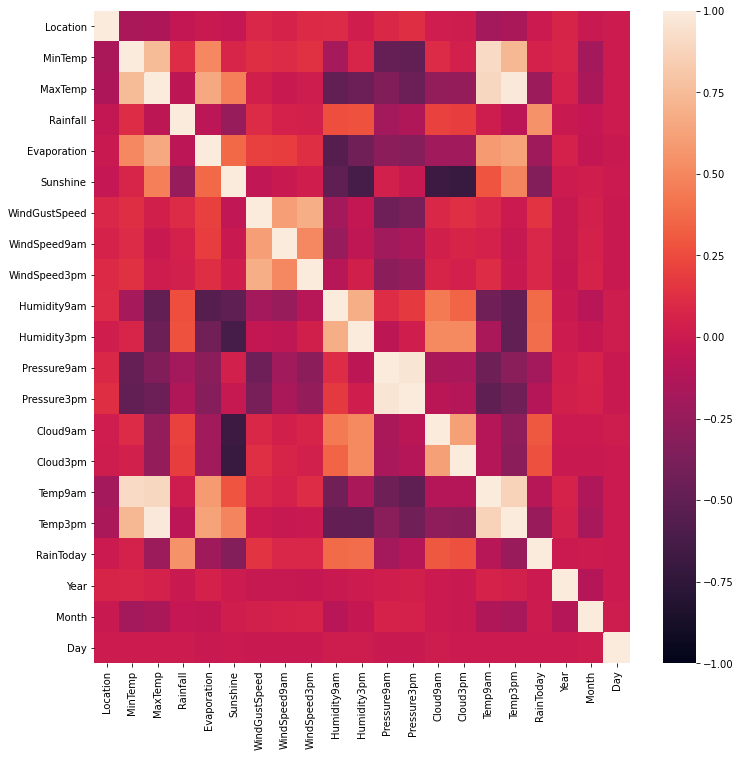

In [14]:
plt.figure(figsize=(12, 12))
corr = sns.heatmap(data.corr(), vmin=-1, vmax=1)

Обработка признаков WindDir3pm, WindGustDir, WindDir9am

In [15]:
data['WindDir3pm'].value_counts()

SE     4153
S      4109
SW     4012
ENE    3946
W      3922
WSW    3856
E      3753
ESE    3703
N      3626
SSW    3485
NE     3390
SSE    3332
WNW    3200
NNW    2766
NW     2727
NNE    2440
Name: WindDir3pm, dtype: int64

In [16]:
cat = pd.get_dummies(data[['WindDir3pm', 'WindGustDir', 'WindDir9am']])

In [17]:
cat = cat.reset_index()
cat.drop(['index'], axis=1, inplace=True)

In [18]:
data = data.reset_index()
data.drop(['index'], axis=1, inplace=True)

In [19]:
data = pd.concat([data, cat], axis=1)
data.drop(['WindDir3pm', 'WindGustDir', 'WindDir9am'], axis=1, inplace=True)
data.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,...,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW
0,4,17.9,35.2,0.0,12.0,12.3,48.0,6.0,20.0,20.0,...,0,0,0,0,0,0,0,0,0,0
1,4,18.4,28.9,0.0,14.8,13.0,37.0,19.0,19.0,30.0,...,0,0,0,0,1,0,0,0,0,0
2,4,19.4,37.6,0.0,10.8,10.6,46.0,30.0,15.0,42.0,...,0,0,0,0,0,0,0,0,0,0
3,4,21.9,38.4,0.0,11.4,12.2,31.0,6.0,6.0,37.0,...,0,0,0,0,0,0,0,0,1,0
4,4,24.2,41.0,0.0,11.2,8.4,35.0,17.0,13.0,19.0,...,0,1,0,0,0,0,0,0,0,0


In [20]:
data[numerical_cols].describe()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Year,Month,Day
count,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,...,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000
mean,12.628837,13.464770,24.219206,2.130397,5.503135,7.735626,40.877366,15.667228,19.786778,65.874123,...,1017.239505,1014.795580,4.241705,4.326515,18.204961,22.710333,0.220879,2012.221074,6.425009,15.723910
std,7.301231,6.416689,6.970676,7.014822,3.696282,3.758153,13.335232,8.317005,8.510180,18.513289,...,6.909357,6.870892,2.797162,2.647251,6.567991,6.836543,0.414843,2.450978,3.451383,8.782527
min,0.000000,-6.700000,4.100000,0.000000,0.000000,0.000000,9.000000,2.000000,2.000000,0.000000,...,980.500000,977.100000,0.000000,0.000000,-0.700000,3.700000,0.000000,2007.000000,1.000000,1.000000
25%,7.000000,8.600000,18.700000,0.000000,2.800000,5.000000,31.000000,9.000000,13.000000,55.000000,...,1012.700000,1010.100000,1.000000,2.000000,13.100000,17.400000,0.000000,2010.000000,3.000000,8.000000
50%,13.000000,13.200000,23.900000,0.000000,5.000000,8.600000,39.000000,15.000000,19.000000,67.000000,...,1017.200000,1014.700000,5.000000,5.000000,17.800000,22.400000,0.000000,2012.000000,6.000000,16.000000
75%,19.000000,18.400000,29.700000,0.600000,7.400000,10.700000,48.000000,20.000000,26.000000,79.000000,...,1021.800000,1019.400000,7.000000,7.000000,23.300000,27.900000,0.000000,2014.000000,9.000000,23.000000
max,25.000000,31.400000,48.100000,206.200000,81.200000,14.500000,124.000000,67.000000,76.000000,100.000000,...,1040.400000,1038.900000,8.000000,9.000000,39.400000,46.100000,1.000000,2017.000000,12.000000,31.000000


Нормируем признаки

In [21]:
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(data)

Разделим датасет на трейн и тест

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, target.values, test_size=0.3)

Обучим модель и предскажем результат

In [23]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)
prediction = lr.predict(X_test)

Оценим качество

In [24]:
from sklearn.metrics import accuracy_score, roc_auc_score

print('Accuracy:', accuracy_score(y_test, prediction))
print(' Roc auc:', roc_auc_score(y_test, prediction))

Accuracy: 0.8556658395368073
 Roc auc: 0.7449102388168107


Попробуем обучить на l1 регуляризаторе и посмотрим на коэффициенты

In [25]:
lr = LogisticRegression(penalty='l1', solver='liblinear')
lr.fit(X_train, y_train)
lr.coef_

array([[-3.04984618e-02, -1.65397549e-01,  8.39538680e-02,
         6.31288123e-02, -2.74302237e-04, -5.48454386e-01,
         7.69787535e-01, -1.09440023e-01, -2.03452603e-01,
         3.17063920e-02,  1.17738818e+00,  9.41530777e-01,
        -1.31110225e+00, -6.22639718e-02,  2.85301777e-01,
         1.82059352e-01,  0.00000000e+00,  2.12964391e-01,
         2.51817608e-02,  5.33563230e-02, -1.04670198e-02,
         4.10837226e-03, -2.71661000e-02,  5.16326533e-03,
         0.00000000e+00, -3.93722533e-02,  9.54138403e-03,
         3.81025649e-02,  3.27719723e-02, -4.14881730e-02,
         9.05366167e-03, -5.65080398e-02, -5.04603698e-02,
        -7.74040152e-02,  2.53879546e-03,  3.42300537e-02,
        -4.70325818e-02, -3.00590385e-02, -5.79731143e-02,
        -2.76146558e-03, -7.55874317e-02, -2.82911924e-02,
        -3.31878709e-02, -1.26000649e-02, -7.03070930e-03,
         1.78329565e-02,  2.55289319e-02,  3.22753773e-02,
         4.07553050e-02,  4.21368987e-02,  3.32050212e-0

Видно, что коэффициенты небольшие, некоторые довольно малые. Основываясь на данном факте, можно аккуратно сделать вывод о непереобученности модели

Попробуем получить больший roc_auc

In [26]:
from sklearn.model_selection import GridSearchCV

grid = {
    "C": [0.01, 0.1, 1, 10, 100], 
    "penalty": ["l1","l2"],
    "solver": ["liblinear"]
}

lr_cv = GridSearchCV(LogisticRegression(), grid, cv=10, scoring='roc_auc')
lr_cv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear']},
             scoring='roc_auc')

In [27]:
print("tuned hpyerparameters :(best parameters) ", lr_cv.best_params_)
print("Roc auc :", lr_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Roc auc : 0.8871187227126175


Обучим модель на лучших гиперпараметрах

In [28]:
lr_best = LogisticRegression(C=100, penalty='l1', solver='liblinear')
lr_best.fit(X_train, y_train)
prediction = lr_best.predict(X_test)

In [29]:
print('Accuracy:', accuracy_score(y_test, prediction))
print(' Roc auc:', roc_auc_score(y_test, prediction))

Accuracy: 0.8557840009452913
 Roc auc: 0.7450802282755761


Мда) иногда тратится неоправдано много времени... Этот случай из этой оперы. Тут становится видна проблема переобучения

Вспомним про матрицу корреляций и отберем линейно зависимые признаки

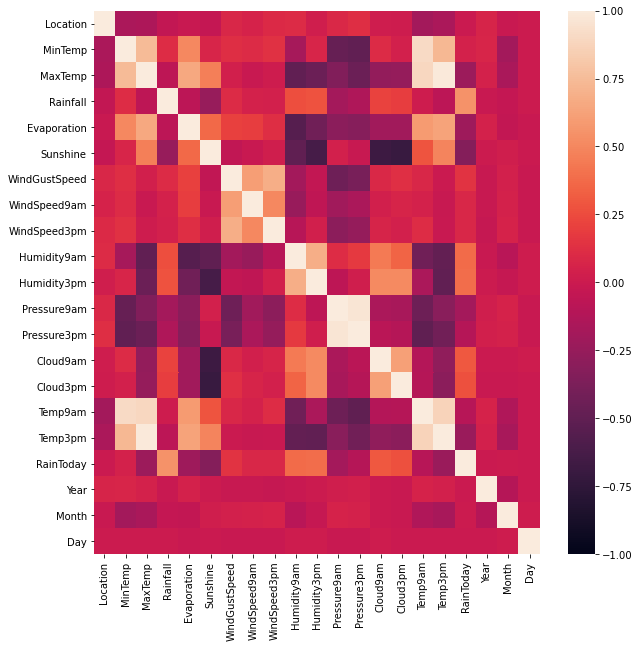

In [30]:
plt.figure(figsize=(10, 10))
corr = sns.heatmap(data[numerical_cols].corr(), vmin=-1, vmax=1)

In [31]:
dep_features = []
cor = data[numerical_cols].corr()
for i in range(cor.shape[0]):
    for j in range(i + 1, cor.shape[1]):
        if cor.iloc[i, j] > 0.6:
            dep_features.append(data[numerical_cols].columns[j])

In [32]:
set(dep_features)

{'Cloud3pm',
 'Evaporation',
 'Humidity3pm',
 'MaxTemp',
 'Pressure3pm',
 'Temp3pm',
 'Temp9am',
 'WindSpeed3pm',
 'WindSpeed9am'}

In [33]:
dep_features = ['MaxTemp', 'Temp3pm', 'Evaporation', 'Humidity3pm', 'Pressure3pm', 'WindSpeed3pm']

In [34]:
data.drop(dep_features, axis=1, inplace=True)

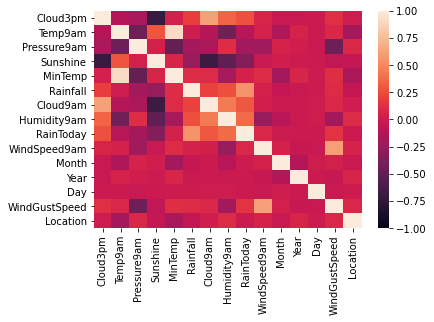

In [35]:
corr = sns.heatmap(data[list(set(numerical_cols) - set(dep_features))].corr(), vmin=-1, vmax=1)

Пробуем еще раз обучиться

In [36]:
X = StandardScaler().fit_transform(data)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, target.values, test_size=0.3)

In [38]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
prediction = lr.predict(X_test)

In [41]:
prediction = lr.predict(X_train)
print('Accuracy:', accuracy_score(y_train, prediction))
print(' Roc auc:', roc_auc_score(y_train, prediction))

Accuracy: 0.837646224742999
 Roc auc: 0.709678272732434


In [39]:
print('Accuracy:', accuracy_score(y_test, prediction))
print(' Roc auc:', roc_auc_score(y_test, prediction))

Accuracy: 0.8375871440387569
 Roc auc: 0.7102454888347384


Получили результат немного хуже, чем предыдущий. Однако видно, что теперь наша модель не переобучается, что гораздо более важно

Итог: предсказание "будет ли завтра дождь в Австралии" дало следующие результаты:

Accuracy: 0.838

Roc Auc : 0.710

Результаты неплохие, но есть куда расти